In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import trimesh as tri

sys.path.insert(0,"../")
from utils import shape_stochastics, mesh_processing

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Application on the Stanford bunny (or any 3D mesh)

In [2]:
# First, get the data to work with it
def get_data(file):
    mesh = o3d.io.read_triangle_mesh(file)
    V, F, Rho = mesh_processing.getDataFromMesh(mesh)
    return(V,F,Rho)

V,F,Rho = get_data("../data/test_data/labrador_preprocessed.ply")

mesh = tri.Trimesh(V,F)
#new_mesh_V, new_mesh_F = mesh_processing.decimate_mesh(V,F,target = 1776) # decimate mesh to speed up computation
#new_mesh = tri.Trimesh(vertices = new_mesh_V, faces = new_mesh_F)
new_mesh, new_mesh_V, new_mesh_F = mesh, mesh.vertices, mesh.faces

In [3]:
# Normalize the data with respect to the unit sphere used as reference to apply the noise
new_mesh_V[:,0] = (new_mesh_V[:,0] - new_mesh_V[:,0].mean()) / new_mesh_V[:,2].max(axis=0)
new_mesh_V[:,1] = (new_mesh_V[:,1] - new_mesh_V[:,1].mean()) / new_mesh_V[:,2].max(axis=0)
new_mesh_V[:,2] = (new_mesh_V[:,2] - new_mesh_V[:,2].mean()) / new_mesh_V[:,2].max(axis=0)

new_mesh = tri.Trimesh(vertices = new_mesh_V, faces = new_mesh_F)

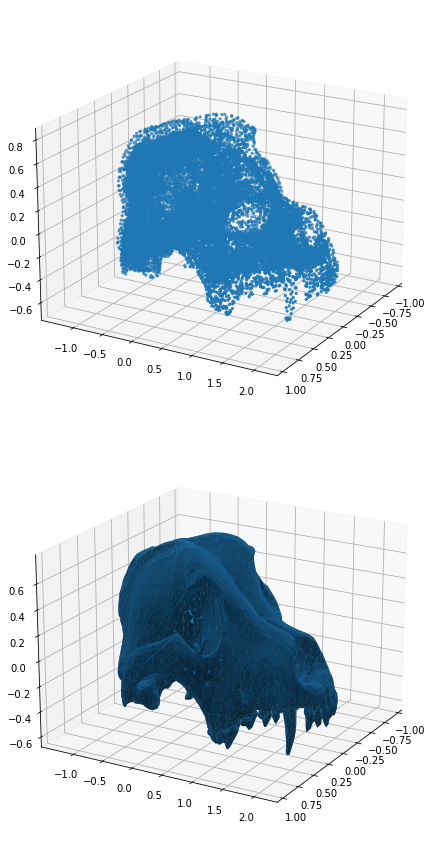

In [4]:
(x_mesh, y_mesh, z_mesh) = new_mesh_V[:,0], new_mesh_V[:,1], new_mesh_V[:,2]

# Take a look at your original mesh
fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(211, projection='3d')
ax1.scatter(x_mesh, y_mesh, z_mesh, s = 5)
ax1.view_init(20, 30, 'z')

ax2 = fig.add_subplot(212, projection='3d')
ax2.plot_trisurf(x_mesh, y_mesh, triangles=new_mesh_F , Z=z_mesh)
ax2.view_init(20, 30, 'z')

plt.tight_layout()
plt.show()

In [17]:
# Compute Q-Wiener process

n = 25
Q = np.eye(n)

shape_stochastics.compute_wiener_process_shape(x_mesh=x_mesh, y_mesh=y_mesh, z_mesh=z_mesh, faces=new_mesh_F, Q=Q, n = 25, t=1, 
                                               n_step=20, make_gif=True, 
                                               file_dir = "tests/wiener_process_skull", file_name = "test.gif",
                                               x_view=-70, y_view=0, z_view=250)

array([[[ 0.24144763,  0.43712488, -0.39611983, ..., -0.02858667,
         -0.14610611, -0.37275212],
        [-0.80751027, -0.50819825, -0.42240266, ..., -1.17938784,
         -1.05537943,  0.63119975],
        [ 0.30181823,  0.00794864, -0.24093472, ...,  0.29072117,
          0.09850361, -0.26247069]],

       [[ 0.22311825,  0.44380353, -0.3877599 , ..., -0.04497378,
         -0.15125345, -0.38982503],
        [-0.81697656, -0.53504191, -0.41586558, ..., -1.19604252,
         -1.07630538,  0.65155087],
        [ 0.27489583, -0.01312117, -0.22603812, ...,  0.2747478 ,
          0.09753087, -0.2729201 ]],

       [[ 0.22429221,  0.44659942, -0.3905695 , ..., -0.03267278,
         -0.13976061, -0.39323928],
        [-0.82275611, -0.55334576, -0.40551415, ..., -1.17880379,
         -1.0537636 ,  0.65872116],
        [ 0.28992112, -0.00981919, -0.2319524 , ...,  0.31573674,
          0.14009828, -0.2665913 ]],

       ...,

       [[ 0.30427917,  0.50591087, -0.3986675 , ...,  0.0702357